# Bike Demand Forecasting with ARIMA
Forecasting daily bike rentals using ARIMA time-series model.

In [1]:
# Install required packages
!pip install statsmodels matplotlib seaborn pandas

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
# Load dataset
df = pd.read_csv('hour.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df = df[['cnt']]
df.head()

,cnt
dteday,
2011-01-01,16
2011-01-01,40
2011-01-01,32
2011-01-01,13
2011-01-01,1


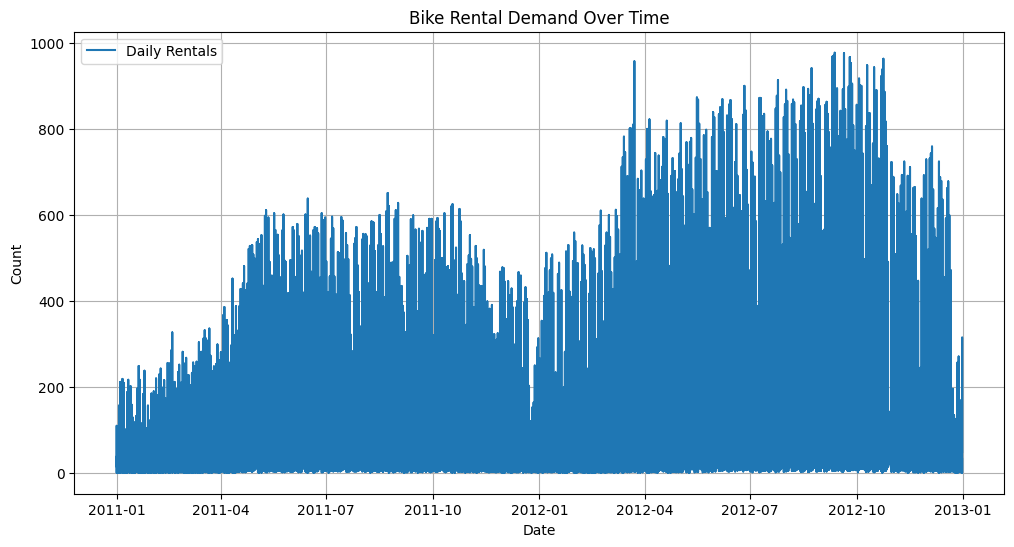

In [7]:
# Visualize the data
plt.figure(figsize=(12,6))
plt.plot(df['cnt'], label='Daily Rentals')
plt.title('Bike Rental Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Train/test split
train = df['cnt'][:600]
test = df['cnt'][600:]
train.shape, test.shape

((600,), (16779,))

In [11]:
# Train ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    cnt   No. Observations:                  600
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2947.405
Date:                Wed, 11 Jun 2025   AIC                           5906.810
Time:                        15:32:25   BIC                           5933.182
Sample:                             0   HQIC                          5917.077
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1823      0.030      6.090      0.000       0.124       0.241
ar.L2         -0.2654      0.052     -5.069      0.000      -0.368      -0.163
ar.L3         -0.1263      0.063     -1.996      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


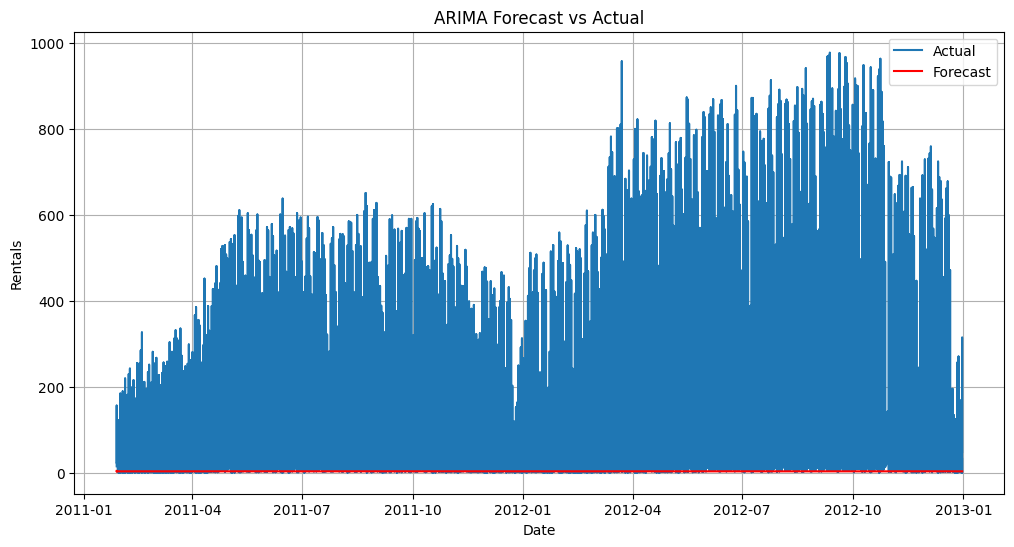

In [12]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 190.15
RMSE: 263.50


1. Rolling Average & Std Dev



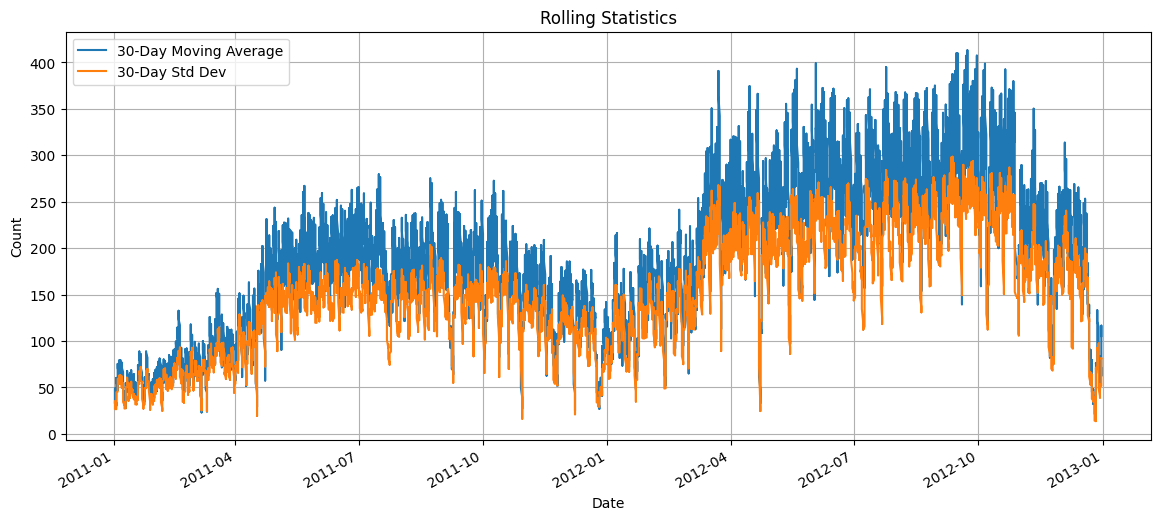

In [17]:
df['cnt'].rolling(window=30).mean().plot(figsize=(14,6), label='30-Day Moving Average')
df['cnt'].rolling(window=30).std().plot(label='30-Day Std Dev')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


2. Prediction Errors Distribution

In [19]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)  # <-- align index


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


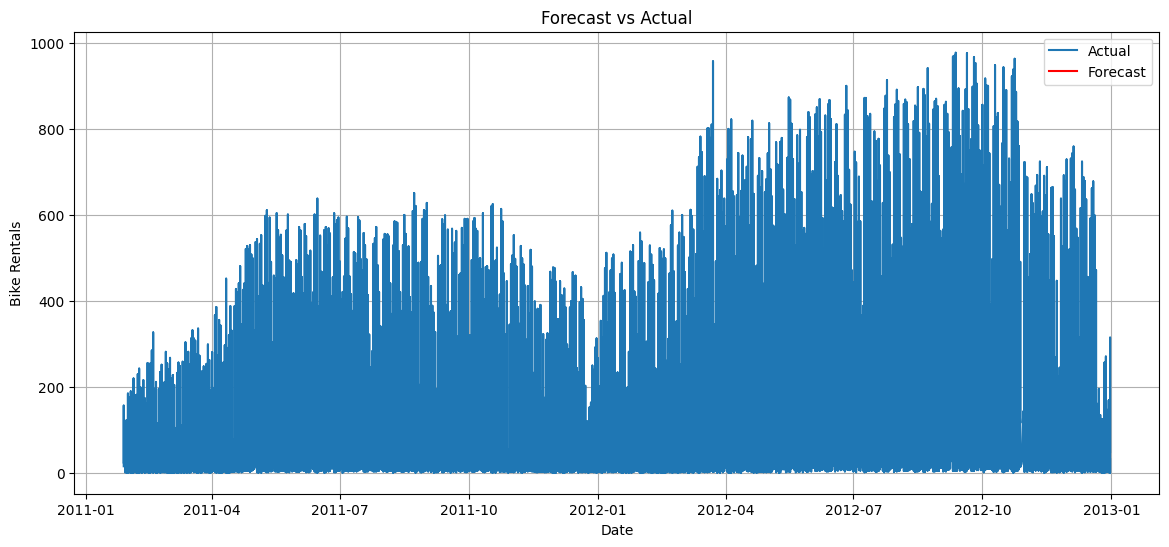

In [20]:
plt.figure(figsize=(14,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.legend()
plt.grid(True)
plt.show()


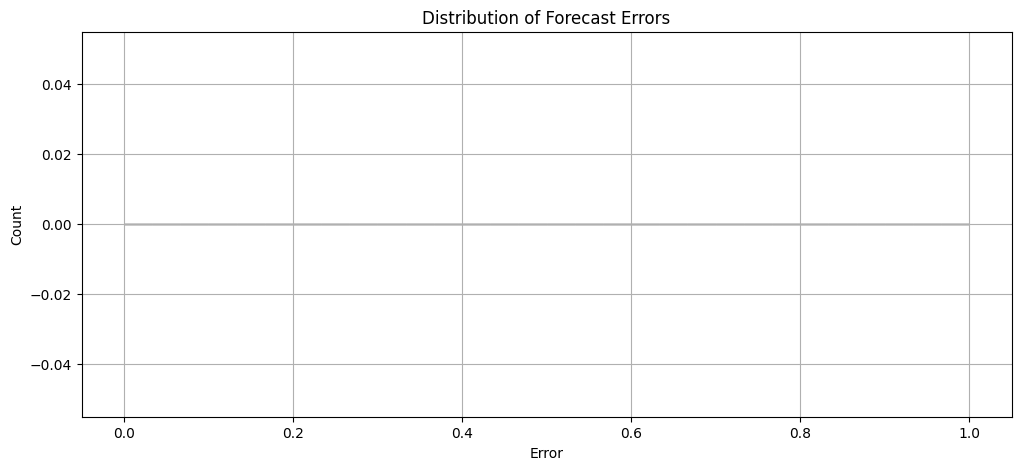

In [21]:
errors = test - forecast
plt.figure(figsize=(12,5))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Forecast Errors')
plt.xlabel('Error')
plt.grid(True)
plt.show()


3. Residual Plot (Error Over Time)

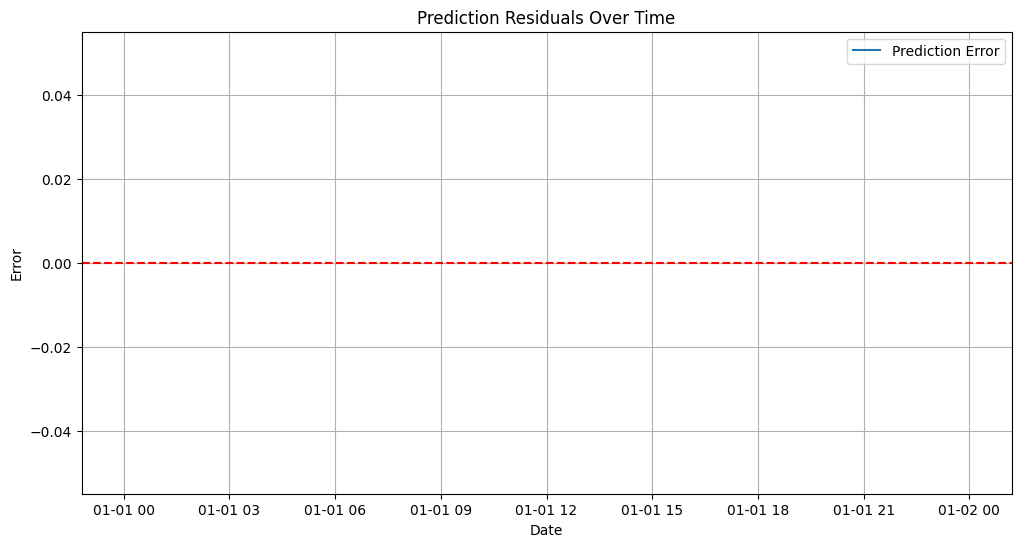

In [22]:
plt.figure(figsize=(12,6))
plt.plot(test.index, errors, label='Prediction Error')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Prediction Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Save the model
import joblib
joblib.dump(model_fit, 'arima_bike_model.pkl')

['arima_bike_model.pkl']